In [1]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

In [2]:
import random
import collections
import numpy as np
import matplotlib.pyplot as plt

# Loading dataset

In [3]:
import pandas as pd
import glob

In [4]:
video_df = pd.read_csv('../../input/youtube_faces_with_keypoints_large.csv')
video_df.head()

,videoID,personName,imageHeight,imageWidth,videoDuration,averageFaceSize,numVideosForPerson
0,Alison_Lohman_0,Alison_Lohman,228.0,213.0,240.0,90.150000,6.0
1,Alison_Lohman_1,Alison_Lohman,248.0,201.0,79.0,108.417722,6.0
2,Alison_Lohman_2,Alison_Lohman,335.0,308.0,136.0,122.161765,6.0
3,Alison_Lohman_3,Alison_Lohman,151.0,110.0,53.0,58.000000,6.0
4,Alison_Lohman_4,Alison_Lohman,236.0,228.0,147.0,91.680272,6.0


In [5]:
# create a dictionary that maps videoIDs to full file paths
npz_files_full_path = glob.glob('../../input/youtube_faces_*/*.npz')
video_ids = [x.split('/')[-1].split('.')[0] for x in npz_files_full_path]

full_paths = {}
for video_id, full_path in zip(video_ids, npz_files_full_path):
    full_paths[video_id] = full_path

# remove from the large csv file all videos that weren't uploaded yet
video_df = video_df.loc[video_df.loc[:,'videoID'].isin(full_paths.keys()),:].reset_index(drop=True)
print('Number of Videos uploaded so far is %d' %(video_df.shape[0]))
print('Number of Unique Individuals so far is %d' %(len(video_df['personName'].unique())))

Number of Videos uploaded so far is 1293
Number of Unique Individuals so far is 374


# Extracting Features

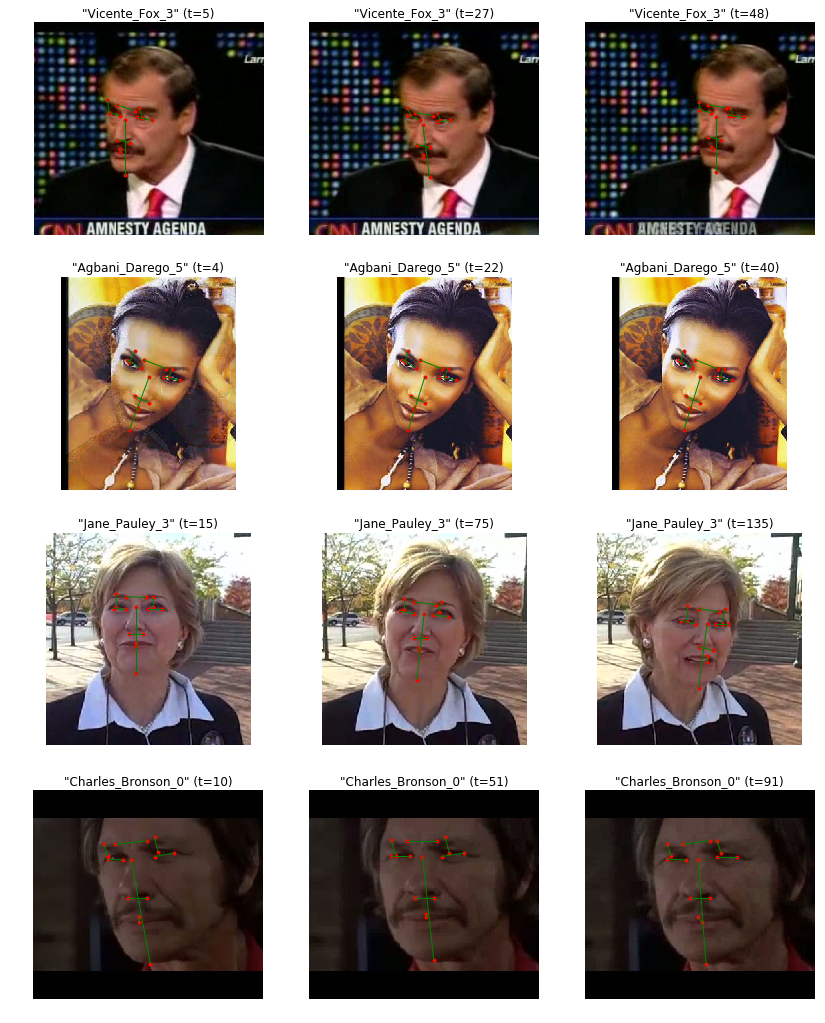

In [6]:
# show several frames from each video and overlay measures
np.random.seed(10)
num_videos = 4
frames_to_show_from_video = np.array([0.1,0.5,0.9])
num_frames_per_video = len(frames_to_show_from_video)

# define measures to be taken

vertical_dim       = [8,27]
upper_lip          = [51,62]
right_eye_width    = [36,39]
left_eye_width     = [42,45]
nose_width         = [31,35]
right_eye_eyebrow  = [19,37]
left_eye_eyebrow   = [23,43]
eyebrowns_distance = [21,22]

list_of_all_measures = [vertical_dim,upper_lip,right_eye_width,
                        left_eye_width,nose_width,
                        right_eye_eyebrow,left_eye_eyebrow,
                        eyebrowns_distance]

# select a random subset of 'num_videos' from the available videos
rand_videos_id = video_df.loc[np.random.choice(video_df.index,size=num_videos,replace=False),'videoID']

fig, ax_array = plt.subplots(nrows=num_videos,ncols=num_frames_per_video,figsize=(14,18))
for i, video_id in enumerate(rand_videos_id):
    # load video
    video_file = np.load(full_paths[video_id])
    color_images = video_file['colorImages']
    bounding_box = video_file['boundingBox']
    landmarks2D = video_file['landmarks2D']
    landmarks3D = video_file['landmarks3D']

     # select frames and show their content
    selected_frames = (frames_to_show_from_video*(color_images.shape[3]-1)).astype(int)
    for j, frame_idx in enumerate(selected_frames):
        ax_array[i][j].imshow(color_images[:,:,:,frame_idx])        
        for con_pts in list_of_all_measures:
            x_pts = landmarks2D[con_pts,0,frame_idx]
            y_pts = landmarks2D[con_pts,1,frame_idx]
            ax_array[i][j].scatter(x=landmarks2D[con_pts,0,frame_idx],
                                   y=landmarks2D[con_pts,1,frame_idx],
                                   s=9,c='r')                        
            ax_array[i][j].plot(x_pts,y_pts,c='g',lw=1)
        ax_array[i][j].set_title('"%s" (t=%d)' %(video_id,frame_idx), fontsize=12)
        ax_array[i][j].set_axis_off()

plt.show()

In [7]:
distance=[np.linalg.norm(landmarks2D[list_of_all_measures,0,frame_idx]-
               landmarks2D[list_of_all_measures,1,frame_idx],axis=1)
                for frame_idx in selected_frames
                for video_id in rand_videos_id]
distance

[array([  72.44998275,   39.05124838,   23.76972865,  109.04127659,
          17.08800749,   21.47091055,  111.39569112,   78.79086241]),
 array([  72.44998275,   39.05124838,   23.76972865,  109.04127659,
          17.08800749,   21.47091055,  111.39569112,   78.79086241]),
 array([  72.44998275,   39.05124838,   23.76972865,  109.04127659,
          17.08800749,   21.47091055,  111.39569112,   78.79086241]),
 array([  72.44998275,   39.05124838,   23.76972865,  109.04127659,
          17.08800749,   21.47091055,  111.39569112,   78.79086241]),
 array([  74.96665926,   14.4222051 ,   45.18849411,  130.43005789,
          19.23538406,   44.10215414,  135.36986371,  104.10091258]),
 array([  74.96665926,   14.4222051 ,   45.18849411,  130.43005789,
          19.23538406,   44.10215414,  135.36986371,  104.10091258]),
 array([  74.96665926,   14.4222051 ,   45.18849411,  130.43005789,
          19.23538406,   44.10215414,  135.36986371,  104.10091258]),
 array([  74.96665926,   14.422205

In [8]:
distance=[np.linalg.norm(landmarks2D[list_of_all_measures,0,:]-landmarks2D[list_of_all_measures,1,:],axis=1)]
distance

[array([[  74.79304781,   74.79304781,   74.79304781,   74.79304781,
           74.79304781,   74.79304781,   72.44998275,   72.44998275,
           72.44998275,   72.44998275,   72.44998275,   72.44998275,
           72.44998275,   72.44998275,   72.44998275,   74.30343195,
           74.30343195,   74.30343195,   74.30343195,   74.30343195,
           74.30343195,   74.30343195,   74.30343195,   73.4982993 ,
           76.85050423,   73.4982993 ,   76.40026178,   76.40026178,
           73.4982993 ,   76.40026178,   72.62231062,   75.82216035,
           75.82216035,   75.82216035,   68.76772499,   72.13875519,
           72.13875519,   75.07329752,   74.96665926,   74.96665926,
           77.79460136,   74.96665926,   74.96665926,   74.96665926,
           74.96665926,   74.96665926,   74.96665926,   74.96665926,
           74.96665926,   74.96665926,   74.96665926,   74.96665926,
           77.79460136,   77.79460136,   77.79460136,   77.79460136,
           77.79460136,   75.07329

In [9]:
people_name = video_df.personName
people_name = list(set(people_name))
people_name

['Itzhak_Perlman',
 'Bill_Clinton',
 'Jane_Rooney',
 'Baburam_Bhattari',
 'Catriona_Le_May_Doan',
 'Nancy_Reagan',
 'Alison_Lohman',
 'Aleksander_Kwasniewski',
 'Clark_Randt',
 'Nancy_Kerrigan',
 'Kristy_Curry',
 'Ethan_Hawke',
 'Lucio_Stanca',
 'Robert_Nardelli',
 'James_Wolfensohn',
 'Lucia_Kenny_Anthony',
 'Cristina_Fernandez',
 'Lester_Holt',
 'Olivia_Newton-John',
 'Tom_Hanks',
 'Ernest_Hollings',
 'Katja_Riemann',
 'Sara_Silverman',
 'Nicanor_Duarte_Frutos',
 'Cristina_Saralegui',
 'Marina_Silva',
 'Carlo_Azeglio_Ciampi',
 'Takeo_Hiranuma',
 'Kate_Capshaw',
 'James_Hoffa',
 'Richard_Branson',
 'Wayne_Allard',
 'Aidan_Quinn',
 'Kristen_Breitweiser',
 'Emilio_Botin',
 'Kim_Gandy',
 'Chris_Matthews',
 'Angelo_Reyes',
 'Frank_Caliendo',
 'Philippe_Gagnon',
 'Chris_Rock',
 'Zhang_Ziyi',
 'Bill_Frist',
 'Nick_Reilly',
 'Recep_Tayyip_Erdogan',
 'Lisa_Ling',
 'Emma_Thompson',
 'Chris_Cirino',
 'Marissa_Jaret_Winokur',
 'Chris_Cooper',
 'Matt_LeBlanc',
 'Queen_Rania',
 'Pedro_Solbes',
 'R